<a href="https://colab.research.google.com/github/JulTob/Optimization/blob/main/Introduction_to_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Optimization

# An adventurer’s guide

Optimization is the art of choosing *the best* among infinitely many possibilities.

Sometimes we want the cheapest option.  
Sometimes the fastest.  
Sometimes the safest, the strongest, or the most elegant.

In this notebook, we will treat it as a journey.


## Our Journey begins

Every optimization problem answers the same question:

> “Where should we go to find our treasure?”

To ask it meaningfully, we always need three things:

- a function that shapes our **landscape**,
- a **space** we can traverse, called the domain,
- and a **goal**: to minimize as low as possible, or maximize as high as possible.



## Unconstrained

In *unconstrained* optimization, the domain is as large as it can be:
every real value is allowed.

There are:
- no bounds,
- no forbidden regions,
- no extra conditions.

The only thing guiding us is the **shape of the function itself**.

In this first expedition, the terrain is open.
Nothing is forbidden.
Every real value is allowed.

This is what *unconstrained* optimization means.


## Functions are landscapes

Instead of thinking of a function as a formula, we should think of it as a landscape.

- horizontal directions represent **choices**,
- vertical height represents **value**.

Depending on the mission, we look for Valleys or Peaks: Places were our function takes a low or hich value. Those are good positions to find the best, but also the worst. Low points are valleys. High points are peaks.


Optimization is way more than just algebra: it is **navigation**.
Before solving anything, we must be  explorer.


## The expedition crew

We are not alone on this journey.

If the **computer** is our ship, then **Python** is the crew.
It follows instructions, performs measurements, and keeps the expedition running.

**SciPy** is our lookout in the crow’s nest. It can tell you exactly where you are, day or night, and help you point the way.

In [22]:
from scipy.optimize import minimize_scalar


But first we need to mark the destination. We define our goal with our **objective**, a function that evaluates how good or bad our position is:

In [23]:
def objective(x):
    return 2*x**2 + x - 1

In code, this means:

- `objective(x)` tells us the height of the landscape at position `x`,
- lower values mean “better” positions when we are minimizing.



## Visualization comes first

Before parting ways, a good sailor finds a map to guide him. The first step to every journey. Not every map marks treasure (life is not that easy), but it can save you endless searching to know the lands and seas you will meet. Where to be careful, where to run, where not to go at all. A plot can give you the same information.

Luckily, python comes with a great set of navigators that can plot for you beautiful maps.
- `matplotlib.pyplot` is the artistic guy that makes beautiful artistry, with a precise hand and eye for details.
- `numpy`is the guy that measures twice, that knows sextants and astrolabius, capable of reading the compass to the atom. He colaborates with the map maker to give him exact measures. We need to use exact proportions!

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot(objective, x_min = -3, x_max = 3):
    # Generate x values for the plot
    x_values = np.linspace(x_min, x_max, 400)
    y_values = objective(x_values)

    # Plot the function
    plt.plot(x_values, y_values)
    plt.title("Plot of objective function")
    plt.xlabel("x")
    plt.ylabel("objective(x)")
    plt.grid(True)
    plt.show()

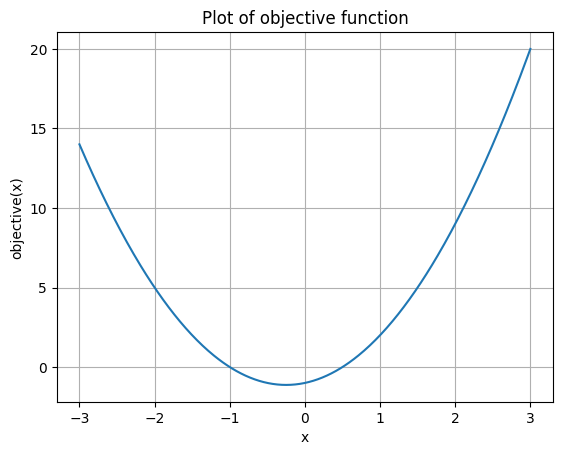

In [25]:
plot(objective)

Once the destination is clear, SciPy explores on our behalf.

## Delegating the search

The lookout does not see the full map.
It does not understand the function symbolically.

It simply takes steps and keeps asking one question:

> “If I move here… is it lower?”

When it is satisfied, it reports back.


In [26]:
result = minimize_scalar(objective)
print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.125
       x: -0.2499999925800001
     nit: 24
    nfev: 27


What SciPy returns iit brings an **expedition log**:

- where it ended (`x`),
- how low it went (`fun`),
- and whether it trusts the result (`success`).


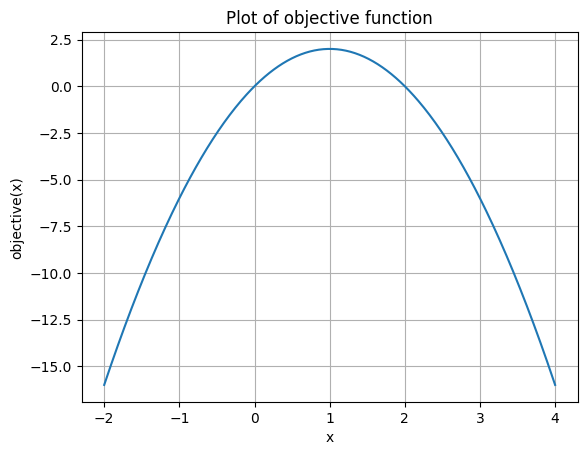

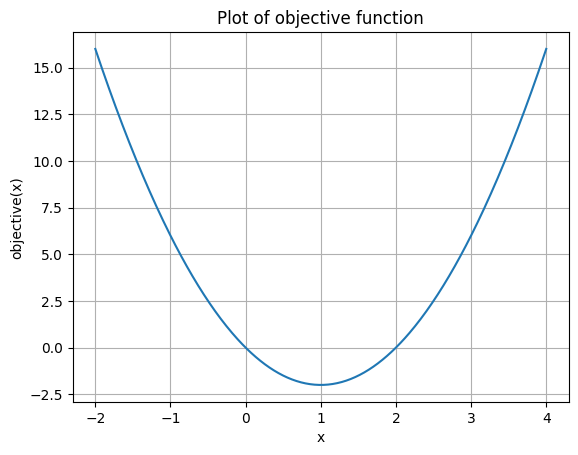

Result:
        at x = 1.0
        valued 2.0  


In [27]:
from scipy.optimize import minimize_scalar

# To MAXIMIZE

def objective(x):
    return 4*x - 2*x**2

plot(objective,-2,4)


def negated_objective(x):
    return -objective(x)

plot(negated_objective,-2,4)

maxima = minimize_scalar(negated_objective)
if maxima.success:
    print(f"""Result:
        at x = {maxima.x}
        valued {-maxima.fun}  """)



## A sea of posibilities.

So far, our examples show just one horizontal line, and the value is determined by how much value there is avobe or below the line.

In higher dimensions, the idea does not change, only the way we represent values. In a surface we need to go up and down, and in more dimensions we can visulize a score that shows the value of our objective function.

But there is one big change: the explorer now chooses in many *directions*, not just forward and backward..


In [28]:
from scipy.optimize import minimize

def objective(x):
    return (x[0]-2)**2 + (x[1]-3)**2 + 2

x0 = [1,1] #-- First guess

result = minimize(objective, x0)
print(f"{result.x}")
print(f"We must head North by {result.x[0]:.1f} units, and East by {result.x[1]:.1f}")

[2.00000001 3.00000002]
We must head North by 2.0 units, and East by 3.0


## Contour maps as topographic charts

In two dimensions, we cannot see the altitute of the surface at once.

Instead, we can draw contour lines:
paths of equal height,
these elevation curves are like cutting horizontally at the same value on a geographical map.

Following these lines shows us how the terrain slopes
and where the valleys lie.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm, colors

def plot_2D(objective, x_rank=(-5,5), y_rank=(-5,5),
            levels=40,
            lines= 12,
            constraints=None,
            title = None):
    if title is None:
        title = "Objective"

    x = np.linspace(x_rank[0], x_rank[1], 200)
    y = np.linspace(y_rank[0], y_rank[1], 200)
    X, Y = np.meshgrid(x, y)

    Z = np.array([objective([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
    feasible_mask = np.ones_like(Z, dtype=bool)

    if constraints is not None:
        for constraint in constraints:
            C = np.array([
                constraint([xi, yi])
                for xi, yi in zip(X.ravel(), Y.ravel())
            ]).reshape(X.shape)

            feasible_mask &= (C >= 0)

    z_min = float(Z.min())
    z_max = float(Z.max())

    filled_levels_count = levels
    line_levels_count = lines

    # --- Decide where to draw contour lines ---
    if isinstance(lines, int):
        # lines is an integer → equidistant levels
        line_levels = np.linspace(z_min, z_max, int(lines))
    else:
        # Level lines (e.g. indifference curves)
        line_levels = np.array(lines)

    plt.figure(figsize=(8, 6))

    Z_masked = np.ma.masked_where(~feasible_mask, Z)

    if constraints is not None:
        for constraint in constraints:
            C = np.array([
                constraint([xi, yi])
                for xi, yi in zip(X.ravel(), Y.ravel())
                ]).reshape(X.shape)
            slack = C  # slack >= 0 is feasible, slack < 0 violated

            plt.contourf(
                X, Y, slack,
                levels=20, alpha=0.2,
                cmap="bone_r"
                )

            plt.contour(
                X, Y, C,
                levels=[0],
                colors="black",
                linewidths=1,
                linestyles=":"
                )

    filled = plt.contourf(
        X, Y, Z_masked,
        levels=filled_levels_count,
        cmap="terrain",
        alpha=0.85
    )

    lines = plt.contour(
        X, Y, Z,
        levels=line_levels,
        cmap="inferno",
        linewidths=1.5,
        alpha=1
    )
    plt.clabel(lines, inline=True, fontsize=8)

    plt.colorbar(filled, label="objective(x, y)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

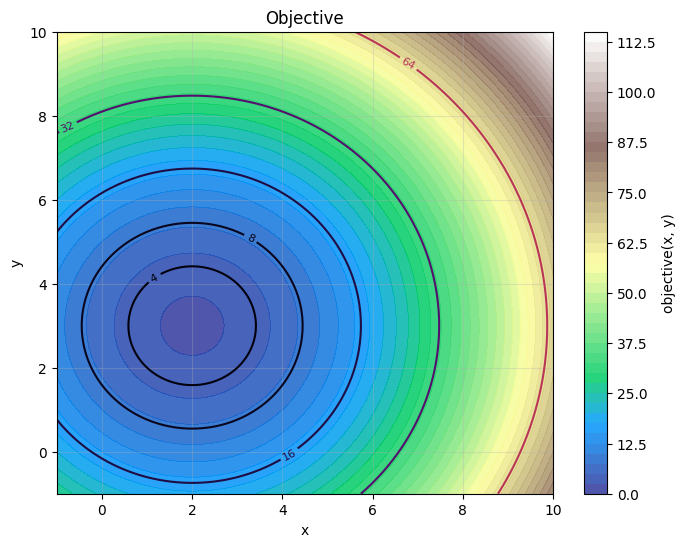

In [30]:
plot_2D(objective, (-1,10), (-1,10), 50, [1,2,4,8,16,32,64,128])


Contour lines mark positions of equal value.
Crossing one line means gaining or losing altitude.

An Optimizer descends by crossing these lines,
always seeking lower ground.


# Boundaries

Up to now, our explorer could wander freely: no walls, no cliffs, no “keep out” signs.

Constraints change that.
They add walls, cliffs, and forbidden regions.

In a bound-constrained problem, each variable lives inside a permitted range:

* too little → your plan isn’t even accepted
* too much → you can’t pay for it
* anywhere in between → fair game for the expedition



# The mission: the Coffee Archipelago 🧭☕

Your ship sails between two coffee-rich islands. As a merchant and you know coffee is easy to sell up north. And you spend long hours sailing, so you could use some high quality coffee yourself!

Two islands sell beans nearby:
* Island of Arenosa:
  - Grows bean you will log as `b[0]`
* Island of Barbuda:
  - these beans you'll log as `b[1]`

Each island demands tribute, effort, and risk. You estimate the costs of the total burden of your expedition, encoded in the objective function.

Unfortunately:

You cannot dock for less than 2 metric units of supplies (the port authority will reject you).

You cannot carry more than 100 units (the supplier would run out!).

Your job is to **choose quantities** that keep total cost as low as possible.




[6. 8.]


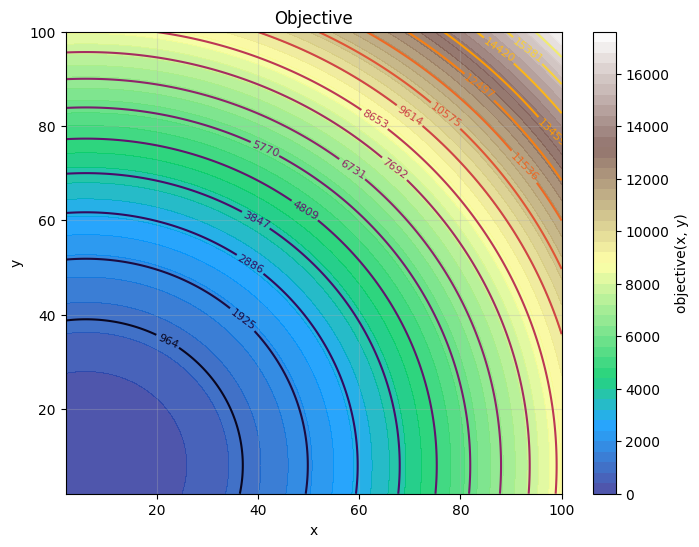

In [31]:
def objective(b):
  return (b[0] - 6)**2 + (b[1] - 8)**2 + 3

# Set the bounds of your problem
bounds = [[2,100],[2,100]]

x0 = [10, 10]

# Find the minimum
result = minimize(objective, x0, bounds=bounds)

print(result.x)

plot_2D(objective, (2,100), (2,100), 50, 19)

---

### What SciPy does for us

We’ll hand this map to our lookout (`scipy.optimize.minimize`) and give it one rule:

> “Search for the lowest valley… **but never leave the allowed sea lanes**.”

`Bounds` are those sea lanes: the legal rectangle on the map you’re allowed to explore.



# Constrains

As a merchant and adventurer, you know there are rules that separate civilization and the lawless. Some of these are treaties, contracts, or even promises. You want to be rich, sure, but there are some principles you abide by, even when nobody is looking.

These rules are called **constraints**.

Some of these "possible, but forviden" actions can be accounted for, and they should!

### From borders to rules

There are two kinds of limits we encounter:

* **Bounds** are borders on the map.
  They say: *“You cannot go beyond this point.”*

* **Constraints** are rules enforced everywhere.
  They say: *“Wherever you are, this must remain true.”*

A constraint might involve:

* the **sum** of your choices,
* their **balance**,
* or a **resource limit** that cannot be exceeded.

Crossing a boundary is _impossible_.
Breaking a constraint is _bad_.

---

# What an optimizer does with constraints

When constraints are present, the optimizer’s mission changes:

> “Find the lowest valley
> **that also respects every condition**.”

The search is no longer about *absolute* best,
but about the best **feasible** solution. The treasure only counts if you’re allowed to keep it.




[5. 7.]


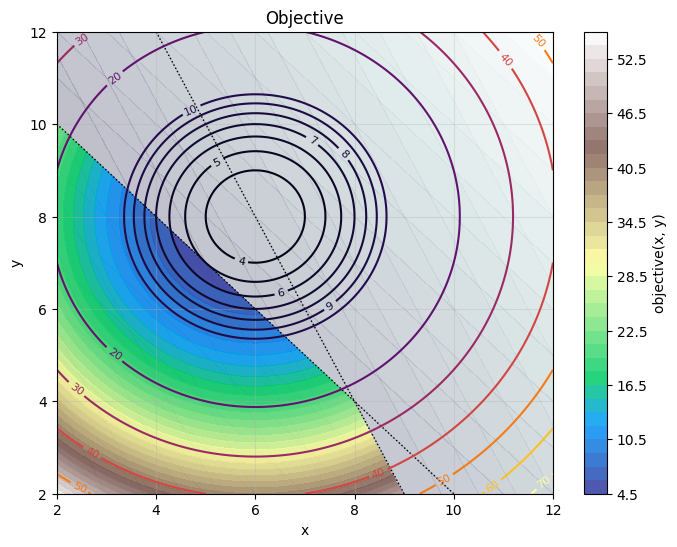

In [32]:
from scipy.optimize import minimize

def objective(b):
    return (b[0] - 6)**2 + (b[1] - 8)**2 + 3


# --- New constraint ---
# Pirates have been seen around!
# We must keep the ship light!
# Total cargo must not exceed 12 units
def cargo_limit(b):
    max_cargo = 12
    return max_cargo - (b[0] + b[1]) # >= 0

def market_limit(b):
    maxima = 20
    return maxima - (2*b[0] + b[1]) # >= 0


bounds = [(2, 100), (2, 100)]
x0 = [5, 5]

constraints = [
    {"type": "ineq", "fun": cargo_limit},
    {"type": "ineq", "fun": market_limit}

]

result = minimize(
    objective,
    x0,
    bounds=bounds,
    constraints=constraints,
)

print(result.x)

plot_2D(
    objective,
    x_rank=(2, 12),
    y_rank=(2, 12),
    constraints=[cargo_limit, market_limit],
    lines = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70]
)


# Programs

## What we mean by a *Program* 📜🧭

Believe it or not, the word **program** is quite old. Going to the theater, you'd be given _the Evening's program_, a sheet that would look like this:

| Times | Play | Author |
|-------|------|--------|
| 12:00 | Treasure Island         | R. L. Stevenson |
| 13:30 | The Three Musketeers            | A. Dumas        |
| 15:00 | Count of Monte Cristo         | A. Dumas      |
| 18:00 | Break | x
| 19:00 | The Tempest               | W. Shakespeare  |
| 22:00 | Don Juan | Lord Byron    |

A *program* is a **declared plan of action**.

You may have seen a political program too: A Political Program declares
what will be done
*if certain conditions are met*, like being elected.

An adventurer's route is also a program. It specifies:

* which routes will be taken,
* which ports will be visited,
* how resources will be allocated.

In this text, **programming does not mean computer programming**.

It means **deciding in advance**:

> *what to do, how much to do, and under which rules.*

Optimization is the art of choosing the **best possible program**.


## From plans to *programs* 📐

Some plans are vague.

Others are precise.

A **program**, in the real sense, is a plan where:

* quantities are specified,
* limits are respected,
* outcomes can be measured.

Programming is all about **structured decision-making**
in a world with limited resources.


# Linear Programming

Historically, the term “Linear Programming” comes from military and logistical planning. It got structured during the 20th century ( long before laptops or Python existed).

## What “linear” really means ⚖️📐

The word *linear* is often misunderstood. It does **not** mean “straight lines on a map”.

A straight route on Earth is not linear once you account for curvature.
A flat-looking surface can hide very non-linear behavior.

In optimization, **linearity is not a geometric idea**.
It is an **algebraic one**.

A problem is *linear* when it respects two simple rules:

* **Addition works**.   
  If you combine two decisions, their effects add up.

* **Scaling works**.    
  If you double a decision, its effect doubles too.

Nothing more.
Nothing less.

This is the language of **vector algebra**.


Not every situation is Linear, but many are. The utility comes when we satisfy certain conditions. Consider the following scenarios:

- If carrying 1 unit of cargo costs 3 coins,
then carrying 2 units costs exactly 6.

- If route A costs 5 and route B costs 7,
taking both costs 12.

There are no discounts. No surprises.

That predictability is what makes the problem *linear*.


## Linear Programming: when the map obeys straight rules 📐🏴‍☠️

In **Linear Programming (LP)**, the word *linear* has a very strict meaning:

* 🔰 The **objective** is linear: total value is the **sum of contributions** of each decision.
* 🔰 The **constraints** are linear: every rule is a **weighted sum** that must stay related (by equality or inequalities) to a limit.

So Linear Programming lives in a world where:

* doubling a decision doubles its effect,
* combining decisions adds their effects,
* there are **no interactions**, no “bulk discounts”, no “if you buy two, then…”.


Because linear relationships obey addition and scaling,
their feasible regions can be drawn using flat surfaces and straight edges.

That geometry is a *consequence* of linearity, not its definition.

Always remember: The algebra comes first.

That’s why Linear Programming is the mathematics of **logistics, cargo, budgets, rations, and route planning**.    
Perfect for merchants. And pirates with spreadsheets.



## New Mission: The Convoy Problem (PuLP) 📦🧭

You are captain of a convoy crossing the Coffee Archipelago.

You can load **three kinds of cargo**:

* **Coffee** (profitable, bulky)
* **Spices** (very profitable, fragile)

Your goal is to **maximize profit**, but you must respect rules:

* ⚓ **Ship capacity**
  - Total weight cannot exceed the hull limit.
* 🪙 **Budget**
  - You can’t buy cargo you can’t afford.
* 💧 **Humidity**
   - Spices rotten more easily, but storing coffe:spices in a proportion at least 2:1 will keep humidity low.



In [33]:
# Linear Programming with PuLP
# Note: This is "programming" in the old sense: planning a mission.
# PuLP is a new hire: our quartermaster.

def SolveConvoy():
    import pulp

    # --- Problem ---
    mission = pulp.LpProblem(
        name="Convoy",
        sense=pulp.LpMaximize
        #-- or LpMinimize in future endeavours
        )
        #-- Here we defined our model for PuLP


    # --- Decision variables (how many tons of cargo) ---
    coffee = pulp.LpVariable(
                        name="Coffee tons",
                        lowBound=0,  #-- Non-Negative
                        cat="Continuous")
    spice  = pulp.LpVariable(
                        name="Spice tons",
                        lowBound=0,
                        cat="Continuous")


    # --- Profits $ Costs per unit in coins ---
    profit_per_coffee = 20
    profit_per_spice  = 50
    cost_per_coffee = 11
    cost_per_spice  = 22

    # Objective: maximize total profit (linear sum)
    mission += (
        profit_per_coffee * coffee
        + profit_per_spice * spice
        ), "Total Profit"

    # --- Constraints ---

    # Weight limit (tons)
    max_weight = 40
    mission += (
        coffee + spice
        <= max_weight
        ), "Weight Limit"

    # Budget (coins to buy cargo)
    budget = 220
    mission += (
        cost_per_coffee * coffee
        + cost_per_spice * spice
        <= budget
        ), "Budget Limit"

    # Humidity proportion limit
    mission += (
        coffee >= 2 * spice
        ), "Humid Limit"

    print(mission)
    #-- We can verify that the mission is set correctly

    # --- Solve ---
    mission.solve()

    status = pulp.LpStatus[mission.status]
    total_profit = pulp.value(mission.objective)

    plan = {
        "status": status,
        "coffee": float(pulp.value(coffee)),
        "spice": float(pulp.value(spice)),
        "profit": float(total_profit),
        }

    return mission, plan

def print_convoy_plan(plan):
    print()
    print("📜 Expedition Log — Final Program")
    print("────────────────────────────────")
    print(f"Status        : {plan['status']}")
    print()
    print("Cargo Manifest")
    print(f"  • Coffee Tons : {plan['coffee']}")
    print(f"  • Spice Tons  : {plan['spice']}")
    print()
    print(f"Total Profit  : {plan['profit']} coins")
    print("────────────────────────────────")
    print()

# Use it
model, plan = SolveConvoy()
print_convoy_plan(plan)



Convoy:
MAXIMIZE
20*Coffee_tons + 50*Spice_tons + 0
SUBJECT TO
Weight_Limit: Coffee_tons + Spice_tons <= 40

Budget_Limit: 11 Coffee_tons + 22 Spice_tons <= 220

Humid_Limit: Coffee_tons - 2 Spice_tons >= 0

VARIABLES
Coffee_tons Continuous
Spice_tons Continuous


📜 Expedition Log — Final Program
────────────────────────────────
Status        : Optimal

Cargo Manifest
  • Coffee Tons : 10.0
  • Spice Tons  : 5.0

Total Profit  : 450.0 coins
────────────────────────────────



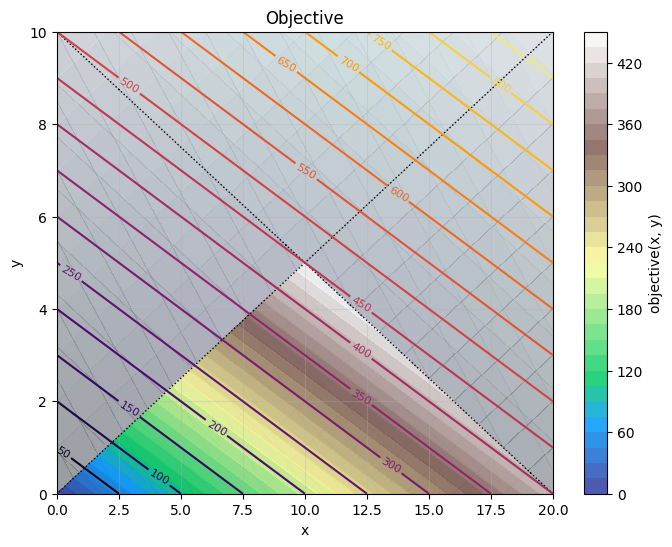

In [42]:
def plot_convoy_2D():
    profit_per_coffee = 20
    profit_per_spice  = 50

    cost_per_coffee = 11
    cost_per_spice  = 22

    max_weight = 40
    budget = 220

    def profit(variable_vector):
        coffee, spice = variable_vector
        return (
            profit_per_coffee * coffee
            + profit_per_spice  * spice
            )

    # Natural plotting bounds from budget:
    # spice <= 220/22 = 10
    # coffee <= 220/11 = 20
    plot_2D(
        profit,
        x_rank=(0, 20),
        y_rank=(0, 10),
        constraints=[weight_limit, budget_limit, humidity_limit],
        lines=19,
    )

plot_convoy_2D()

# From single decisions to many: vectors and matrices 🌶️📦

So far, our missions have involved **a handful of decisions**:

* how much coffee,
* how much spice.

Each decision was a single number.
Each constraint was a single rule. But real expeditions are rarely that simple.

Spices, for example, are not one thing. They are a **category**. Cinnamon, oregano, pepper, turmeric… each one is considered differently:

* different price,
* different taste,
* different demand.

At this point, writing one variable per spice becomes clumsy. The route is still the same, but we need **better notation**.

This is where **vectors** enter the story.

---

# Decision vectors 📐

Instead of deciding one quantity at a time, we decide **a list of quantities**:

$$
\vec{x} =
\begin{bmatrix}
x_{\text{cinnamon}} \\
x_{\text{oregano}} \\
x_{\text{pepper}}
\end{bmatrix}
$$

This is not a new idea, just a compact one. The vector $\vec{x}$ is still a decision:

Nothing magical happened.
We just stopped naming each barrel individually.




## Linear objectives become dot products 🪙

Profit now comes from **many contributions**.

Each spice has a profit per unit:

$$
\vec{p} =
\begin{bmatrix}
480 \\
510 \\
430
\end{bmatrix}
$$

Total profit is still linear, just written compactly:

$$
\text{Profit} = \vec{p} · \vec{x}
$$

This is simply:

* price × quantity, for each spice
* all added up.

Just efficiently written bookkeeping.

This is why Linear Programming loves vectors.



## New Mission: The Spice Must Flow  📜🌶️

A merchant does not sell “spice”.
They sell **a list of products**: cinnamon, oregano, pepper…

You’ve commissioned a sleek spice-boat. It’s fast, dry, and built for variety.

You are heading to a new port, so you must make sure to buy a variety of spices to take home.

1. You must take at least 1 unit of each spice.

2. The maximum percentage of one spice must be 25%, related to your whole cargo.


In [35]:
def TheSpiceMustFlow():
    import pulp

    # --- Cargo catalog (vector index) ---
    spices = [  "cinnamon",
                "oregano",
                "pepper",
                "cumin",
                "mustard",
                "ginger",
                "cayenne",
                "nutmeg"]

    profit_per_ton = {
                "cinnamon": 60,
                "oregano": 40,
                "pepper": 80,
                "cumin": 55,
                "mustard": 40,
                "ginger": 50,
                "cayenne": 75,
                "nutmeg": 65,
                }

    # --- Mission limits ---
    max_total_tons = 42.0           # total tons you can carry
    minimum_each_ton = 1
    max_share = 0.25            # no spice may exceed 25% of total cargo

    # --- LP problem ---
    mission = pulp.LpProblem(
        name="SpiceBoatLedger",
        sense=pulp.LpMaximize
        )

    # === Decision vector: tons of each spice ===
    spice_tons = pulp.LpVariable.dicts(
        "SpiceTons",
        spices,
        lowBound=0,
        cat="Continuous",
        )

    total_tons = pulp.lpSum(
                    spice_tons[spice] for spice in spices)

    # --- Objective: p·x ---
    mission += pulp.lpSum(
                    profit_per_ton[spice] * spice_tons[spice]
                        for spice in spices
                        ), "TotalProfit"

    # --- Constraints ---
    # Capacity: sum(x) <= max_total_tons
    mission += (
        total_tons <= max_total_tons
        ), "BoatCapacity"

    # Variety: each spice >= minimum_each_ton
    for spice in spices:
        mission += (
            spice_tons[spice] >= minimum_each_ton
            ), f"Minimum_{spice}"

    # Diversity: each spice <= 25% of total cargo
    # (Linear form: spice_i <= max_share * total_tons)
    for spice in spices:
                mission += (
                    spice_tons[spice] <= max_share * total_tons
                    ), f"MaxShare_{spice}"

    # --- Solve ---
    mission.solve()
    status = pulp.LpStatus[mission.status]

    plan = {
        "status": status,
        "profit": float(pulp.value(mission.objective)),
        "cargo": {spice: float(pulp.value(spice_tons[spice])) for spice in spices},
        "total_tons": float(pulp.value(total_tons)),
        }

    return mission, plan


def PrintSpiceBoatLedger(plan):
    print()
    print("📜 Spice-Boat Ledger — Final Program")
    print("────────────────────────────────────")
    print(f"Status      : {plan['status']}")
    print(f"Total tons  : {plan['total_tons']:.2f}")
    print()

    print("Cargo Manifest")
    for spice, qty in sorted(plan["cargo"].items(), key=lambda item: -item[1]):
        print(f"  • {spice:8s}: {qty:6.2f} tons")

    print()
    print(f"Total Profit: {plan['profit']:.2f} coins")
    print("────────────────────────────────────")
    print()


model, plan = TheSpiceMustFlow()
PrintSpiceBoatLedger(plan)
#print(model)



📜 Spice-Boat Ledger — Final Program
────────────────────────────────────
Status      : Optimal
Total tons  : 42.00

Cargo Manifest
  • pepper  :  10.50 tons
  • cayenne :  10.50 tons
  • nutmeg  :  10.50 tons
  • cinnamon:   6.50 tons
  • oregano :   1.00 tons
  • cumin   :   1.00 tons
  • mustard :   1.00 tons
  • ginger  :   1.00 tons

Total Profit: 2885.00 coins
────────────────────────────────────



# Mix of a matrix ⚓

Up to now, we’ve seen how decisions become vectors: a list of quantities we choose all at once. Something similar happens with constraints.

Each constraint is just a rule that says:

> “Take these quantities, weigh them in this way, and make sure the result stays below a limit.”

In other words:

> Each constraint is a weight of your decisions.

After traveling around, you decide not to sell raw spices anymore.
People at home don’t really know what to do with those sacks of succulent spices!

What they *do* love are mixtures.

You tasted some recipes in your last port, and you know they’ll sell fast.

Each mixture uses spices in fixed proportions.

| Mixture | Cinnamon | Oregano | Pepper | Cumin | Mustard | Ginger | Cayenne | Nutmeg |
| ------------------- | -------- | ------- | ------ | ----- | ------- | ------ | ------- | ------ |
| **Garam Masala**    | 12       | 0       | 18     | 22    | 0       | 20     | 0       | 28     |
| **Cajun Blend**     | 0        | 20      | 25     | 10    | 15      | 0      | 30      | 0      |
| **Curry Powder**    | 8        | 5       | 12     | 30    | 10      | 25     | 5       | 5      |
| **Ras el Hanout**   | 15       | 0       | 20     | 25    | 0       | 15     | 10      | 15     |
| **Port Royal Blend**  | 0        | 25      | 20     | 5     | 10      | 20     | 20      | 0      |
| **Harissa Blend**   | 0        | 10      | 25     | 20    | 0       | 15     | 30      | 0      |

Now, say we want to consider selling at least 10 units of Garam Masala.

$$
12c + 0o + 18p + 12cm + 0m + 20g + 0cy > 10
$$

Nothing mysterious is happening here.

Each row is just saying:

> “To produce this much mix, you must spend these exact proportions of spices.”

## One rule per row ⚓

Suppose you decide to produce:

* $(m_1)$ units of Garam Masala
* $(m_2)$ units of Cajun Blend
* $(m_3)$ units of Curry Powder

Then your total usage of **cinnamon** is:

$$
12m_1 + 0m_2 + 8m_3
$$

Your total usage of **cumin** is:

$$
22m_1 + 10m_2 + 30m_3
$$

And so on, for every spice.

Each spice stock gives you a rule:

Write several such rules, and something interesting happens.

They stack naturally into a **matrix**:

$$
A \vec{x} \leq \vec{b}
$$

Where:

* **A** encodes how each mix contributes to each rule,
* **x** is your spice ledger plan,
* **b** is the limits of your conditions.



If we write all those rules together, they *stack* automatically.

The table above **is already a matrix**:

$$
A=
\begin{bmatrix}
12 & 0  & 8  & 15 & 0  & 0 \\
0  & 20 & 5  & 0  & 25 & 10 \\
18 & 25 & 12 & 20 & 20 & 25 \\
22 & 10 & 30 & 25 & 5  & 20 \\
0  & 15 & 10 & 0  & 10 & 0 \\
20 & 0  & 25 & 15 & 20 & 15 \\
0  & 30 & 5  & 10 & 20 & 30 \\
28 & 0  & 5  & 15 & 0  & 0
\end{bmatrix}
$$





With column order:
$$
\big[
\text{Garam},\\
\text{Cajun},\\
\text{Curry},\\
\text{Ras},\\
\text{PortRoyal},\\
\text{Harissa}
\big]
$$

and Row order:
$$
\big[
\text{Cinnamon},\ \text{Oregano},\ \text{Pepper},\ \text{Cumin},\ \text{Mustard},\ \text{Ginger},\ \text{Cayenne},\ \text{Nutmeg}
\big]
$$

Notice what happened: the **recipe table** *is* the matrix. We didn’t invent (A).

In our Matrix formula, the vector x is the cuantities of Mixtures.

$$
\mathbf{x}=
\begin{bmatrix}
x_{\text{Garam}}\\
x_{\text{Cajun}}\\
x_{\text{Curry}}\\
x_{\text{Ras}}\\
x_{\text{PortRoyal}}\\
x_{\text{Harissa}}
\end{bmatrix}
$$

and our b vector is the quantities of spices:
$$
\mathbf{b}=
\begin{bmatrix}
b_{\text{Cinnamon}}\\
b_{\text{Oregano}}\\
b_{\text{Pepper}}\\
b_{\text{Cumin}}\\
b_{\text{Mustard}}\\
b_{\text{Ginger}}\\
b_{\text{Cayenne}}\\
b_{\text{Nutmeg}}
\end{bmatrix}
$$

Then we can simplify our records using Matrix Notation:

$$
A\vec{x}\le \vec{b}
$$

If you later want “at least 10 units of each mix”, that becomes:

$$
\vec{x_0}=
\begin{bmatrix}
10\\10\\10\\10\\10\\10
\end{bmatrix}
$$

$$
A\vec{x}\ge A\vec{x_0}
$$



This is advanced math, but can be done easily with organization and foresight.

Nothing extraordinary happened.
No new idea was invented.
We are just using tables in a smart way.

We simply:

* wrote many similar rules,
* noticed they share the same structure,
* and organized them efficiently.

A **matrix** is just what it looks like **once you stop writing rules one by one**.


## Why this matters

Linear Programming does not think in isolated equations.
It thinks in **systems of rules**.

Once your cargo is a vector
and your recipes are rows of a matrix,
large problems stop being complicated.
They just become **larger tables**.

And the optimizer still asks the same question, as always:

> “Among all plans that respect every recipe and every limit…
> which one is best?”





In [36]:
# --- New Mission: "The Spice Alchemy Ledger" (Matrix LP with PuLP) ---
# We choose how many units of each MIX to produce.
# Each mix consumes spices in fixed proportions (the recipe table = matrix A).

def MatrixMix():

    import pulp
    import numpy as np

    # --- Mixes (decision variables) ---
    mixes = [
        "Garam",
        "Cajun",
        "Curry",
        "Ras",
        "PortRoyal",
        "Harissa",
        ]

    # --- Spices (rows of A) ---
    spices = [
        "Cinnamon",
        "Oregano",
        "Pepper",
        "Cumin",
        "Mustard",
        "Ginger",
        "Cayenne",
        "Nutmeg",
        ]

    # A[mix][spice] = proportions of each spice
    recipes = {
        "Garam":     {"Cinnamon":12, "Oregano":0,  "Pepper":18, "Cumin":22, "Mustard":0,  "Ginger":20, "Cayenne":0,  "Nutmeg":28},
        "Cajun":     {"Cinnamon":0,  "Oregano":20, "Pepper":25, "Cumin":10, "Mustard":15, "Ginger":0,  "Cayenne":30, "Nutmeg":0},
        "Curry":     {"Cinnamon":8,  "Oregano":5,  "Pepper":12, "Cumin":30, "Mustard":10, "Ginger":25, "Cayenne":5,  "Nutmeg":5},
        "Ras":       {"Cinnamon":15, "Oregano":0,  "Pepper":20, "Cumin":25, "Mustard":0,  "Ginger":15, "Cayenne":10, "Nutmeg":15},
        "PortRoyal": {"Cinnamon":0,  "Oregano":25, "Pepper":20, "Cumin":5,  "Mustard":10, "Ginger":20, "Cayenne":20, "Nutmeg":0},
        "Harissa":   {"Cinnamon":0,  "Oregano":10, "Pepper":25, "Cumin":20, "Mustard":0,  "Ginger":15, "Cayenne":30, "Nutmeg":0},
        }

    # --- Build numeric matrix A in order ---
    A = np.array([[
            recipes[mix][spice] / 100.0
                    for mix in mixes]
                    for spice in spices],
            dtype=float
            )

    # Cost per gram of spice (what you pay while traveling)
    costs = {
        "Cinnamon": 0.060,
        "Oregano":  0.040,
        "Pepper":   0.080,
        "Cumin":    0.055,
        "Mustard":  0.040,
        "Ginger":   0.050,
        "Cayenne":  0.075,
        "Nutmeg":   0.065,
        }


    # Profit per gram of mix (what you earn when you sell the finished mix)
    profits = {
        "Garam":     0.11,
        "Cajun":     0.10,
        "Curry":     0.09,
        "Ras":       0.12,
        "PortRoyal": 0.10,
        "Harissa":   0.115,
    }

    budget = 300.0  # coins
    min_mix = 500.0  # at least 1 kg of each mix


    # Vectors (for reporting + matrix sanity checks)
    cost_vec   = np.array([costs[s] for s in spices], dtype=float)
    profit_vec = np.array([profits[m] for m in mixes], dtype=float)



    # --- LP model ---
    mission = pulp.LpProblem(name="SpiceMixMatrix", sense=pulp.LpMaximize)

    # Decision variables: grams of each mix
    x = pulp.LpVariable.dicts("mix_grams", mixes, lowBound=0, cat="Continuous")

    # Constraints: x >= 1000g each
    for mix in mixes:
        mission += (x[mix] >= min_mix), f"Min_{mix}"

    # Budget: cost_per_gram_spice^T (A x) <= budget
    # Implement (A x) by summing recipe coefficients.
    mission += (
        pulp.lpSum(
            costs[spice] *
            pulp.lpSum(
                (recipes[mix][spice] / 100.0) * x[mix]
                for mix in mixes
            )
            for spice in spices
        )
        <= budget
    ), "Budget"

    # Objective: maximize profit from mixes = profit_per_gram_mix^T x
    mission += pulp.lpSum(profits[mix] * x[mix] for mix in mixes), "Profit"

    # Solve
    mission.solve()

    # --- Report (with the matrix, like a civilized wizard) ---
    x_solution = np.array([float(pulp.value(x[m])) for m in mixes], dtype=float)
    y_solution = A @ x_solution  # grams of each spice you must buy

    spent = float(cost_vec @ y_solution)
    earned = float(profit_vec @ x_solution)

    plan = {
        "status": pulp.LpStatus[mission.status],
        "mix_grams": {mixes[i]: float(x_solution[i]) for i in range(len(mixes))},
        "spice_grams_to_buy": {spices[i]: float(y_solution[i]) for i in range(len(spices))},
        "budget_spent": spent,
        "profit": earned,
    }
    return plan


def PrintSpiceMixPlan(plan):
    print("📜 Spice Mix Plan")
    print("────────────────────────────────────────")
    print(f"Status:       {plan['status']}")
    print(f"Budget spent: {plan['budget_spent']:.2f} coins")
    print(f"Profit:       {plan['profit']:.2f} coins")
    print()

    print("Mix production (grams):")
    for mix, grams in sorted(plan["mix_grams"].items(), key=lambda item: -item[1]):
        print(f"  • {mix:10s}: {grams:10.1f}")

    print()
    print("Spices to buy (grams) Ax:")
    for spice, grams in plan["spice_grams_to_buy"].items():
        print(f"  • {spice:9s}: {grams:10.1f}")


plan = MatrixMix()
PrintSpiceMixPlan(plan)



📜 Spice Mix Plan
────────────────────────────────────────
Status:       Optimal
Budget spent: 300.00 coins
Profit:       538.08 coins

Mix production (grams):
  • Ras       :     2338.2
  • Garam     :      500.0
  • Cajun     :      500.0
  • Curry     :      500.0
  • PortRoyal :      500.0
  • Harissa   :      500.0

Spices to buy (grams) Ax:
  • Cinnamon :      450.7
  • Oregano  :      300.0
  • Pepper   :      967.6
  • Cumin    :     1019.5
  • Mustard  :      175.0
  • Ginger   :      750.7
  • Cayenne  :      658.8
  • Nutmeg   :      515.7


## ☠️ The Greedy Pirate Problem

Did you noticed the result? Something curious just happened.

We gave our quartermaster, PuLP, a very clear mission:

> “Maximize profit.   
> Respect the recipes.   
> Produce at least a little of everything.”   

And PuLP nodded, sharpened its quill…
and poured *almost everything* into a single mix.

At first glance, this feels wrong.

A real merchant would hesitate:

> “Surely a balanced cargo is safer.”   
> “What if demand shifts?”    
> “What about reputation, variety, risk?”   

But the solver doesn’t hesitate.













## 🏴‍☠️ How a pirate thinks

Linear Programming lives in a very specific universe:

* Every unit of product is **independent**,
* Each unit yields **exactly the same profit**, forever
* there are **no surprises**, no fatigue, no market saturation,
* the future does not exist.

A linear optimizer is not a strategist.
It is a **greedy pirate**.






It scans the horizon and asks only one question:

> “Which direction increases profit *the fastest*?”

That direction is called an **extreme point**.

Once found, the pirate sails straight toward it, ignoring everything else except the rules that physically stop the ship.













## 🧭 The Ethics of Optimization

Think for a moment:

> If enslaving people paid better than trading spices, would **you** change your cargo?

History’s darkest chapters weren’t written by _evil_ monsters. They were written by ordinary people following incentives that felt reasonable at the time. Many were not seeking cruelty, just a **better** life for **themselves**.










“Better” is a dangerous word.

When profit, power, and ideology become the only objective, optimization quietly bends behavior. Ships change cargo. Laws adapt. Language softens. What begins as trade becomes extraction. Work becomes exploitation. Nature becomes resources. Empires and chartered companies did exactly this, and renamed slavery as "commerce".





A solver will not invent your ethics for you.

If **Fair Trade** matters, it has to be inserted into the model.

With constrains
> “never carry this”.    

with penalties
> “this _cost_ is unacceptable”  

or a new objective  
> “maximize human wellbeing”










Otherwise the greedy pirate does what greedy pirates always do: it sails straight toward the most profitable, most efficient, darkest corner of the map.










### **If you don’t encode your values, the optimizer won’t guess them.**

The solver knows nothing of risk, resilience, aesthetics, long-term strategy, brand identity, human intuition.

It only knows what you *formalize*.

If diversity matters, you must **say so**.
If balance matters, you must **pay for it**.
If greed is dangerous, you must **penalize it**.

Optimization is used everywhere (markets,
logistics,
recommendation systems,
trading,
resource extraction,
social media feeds)

And we can see the effects:
monocultures,
systemic fragility,
extreme specialization,
resource exhaustion,
exploitation.

The algorithm didn’t go mad. It was designed that way. And we look and wonder how we got to this point.

The real question is: Can we constrain ourselves? Can we find a greater objective? Can we make something worth optimizing?


# Finding Greed
> _Compelled by greed, we were, but now we are consumed by it._ - Captain Barbossa

In [44]:
def AccountantPirateAudit(recipes, mixes, spices, costs, profits):
    # Effective cost per gram of mix = sum_spice( cost_spice * proportion_spice_in_mix )
    effective_cost = {}
    ratio = {}
    for mix in mixes:
        cost_per_gram = sum(
            costs[spice] * (recipes[mix][spice] / 100.0)
            for spice in spices
        )
        effective_cost[mix] = cost_per_gram
        ratio[mix] = profits[mix] / cost_per_gram  # profit per coin (shadow-value intuition)

    print("📜 Accountant Pirate Audit: profit-per-coin")
    for mix in sorted(mixes, key=lambda m: -ratio[m]):
        print(f"  • {mix:10s} | cost/g={effective_cost[mix]:.4f} | profit/g={profits[mix]:.4f} | profit/coin={ratio[mix]:.3f}")


In [45]:
def PrintShadowPrices(model):
    print("📜 Dual Ledger (shadow prices + slack)")
    for name, constraint in model.constraints.items():
        shadow_price = getattr(constraint, "pi", None)
        slack = getattr(constraint, "slack", None)
        print(f"  • {name:20s} | pi={shadow_price} | slack={slack}")


## 🔰 The Mission: Solve the Optimization Problem

Every optimization problem, no matter how fancy, is just a mission with four parts:

### 🏵 Choices:
These are your decisions. Usually represented by numbers according to its nature:
- Integers:
  - Number of coins to spend
  - Order of keys to press
  - Result on a Dice Throw
- Reals
  - Liters of Rum to sell
  - Kilograms of supplies to take
  - Average vote of your crew
- Vectors
  - Direction to sail towards
  - Our list of spices
  - The strength of the compass
- Binary
  - Lights on or off
  - Friend or Foe
  - On time, or too late.

Instead of picking one value at a time, we list all our decisions into one column, known as the **Decision Vector**:

$$
\vec{decision}=
\begin{bmatrix}
decision_1\\
decision_2\\
\vdots
\end{bmatrix}
$$



















### 🏵 Rules


These are the constraints and bounds of the *feasible set*.

Bounds mark the places were you **cannot** go.

Constraints mark the places where you **should not** go.

- Bound: Your ship cannot climb a mountain.
- Constraint: Your ship should not head towards the reef.

- Bound: You cannot fly.
- Constraint: You should not walk the plank.

When you are planning inside bounds and constrains, then your plan is said to be Feasible. Doesn't mean it's good, just not horribly misguided.



### 🏵  Score:

When we assign every plan a value, we call it the *objective function*

| Plan | Objective |
|------|-----------|
| Sell coconuts | 5 points |
| Eat coconuts | 2 points |
| Hit your head with a coconut | -4 points |
| Fight a monkey and losing your coconut | -infinite points |

The resulting number is the **objective**: a single value that tells you how good or bad a plan is.

And then we declare what “better” means: Usually a good rule of thumb is to **maximize** the good things in life or to **minimize**  the bad things.
Either way, the mission needs a scoreboard.

> _Writting things down in a notepad is the difference between screwing around and SCIENCE._ - Mythbusters


### 🏵 Goal:

The solution is simply the best plan *among the allowed ones*: the *optimum*

Not always _the best plan in the universe_, but the best plan that you’re allowed to keep.

Optimizers are in constant search for the Optimum. It's like the One Piece!



## 🧭 The World of Convex Optimization

Imagine a landscape where if you walk downhill and can’t go any lower, you are *guaranteed* to be at the absolute lowest point. No hidden valleys, no false bottoms. This is the peculiar and incredible world of **Convex Optimization**.


### 🧠 What Does "Convex" *Really* Mean?

Forget geometric shapes for a moment. In this context, "convex" describes a very special kind of problem. Think of it like this:

> Take any two valid plans. If *every* plan *between* them is also valid, then your problem space is convex.

What does this imply? It means there are:
*   **No forbidden gaps**: You can always interpolate between two good options without hitting a wall.
*   **Compromises**: Averaging two successful strategies never leads to failure.

This is why convex optimization feels so *reliable*, so *civilized*.

On your map, an island is convex if you can walk straight to any destination without ever needing to swim.

> -   # A hexagon is convex ⬡
> -   # A star is not ✡









## ⚓ Linear Programming is convex!

Remember our adventures with Linear Programming? Those linear constraints carve out space with straight edges, and linear objectives simply tilt a flat plane across that space. And here’s something wonderful:

> A linear objective over a convex region *always* reaches its optimum at a "corner" (or along an edge), and crucially, **the best value is unique**, but that value can be found in more than one point.

It is worth mentioning that a _region_ of the map can have the optimum value in many points. Crucially, these points will be a convex region themselves! They will pack together in a continous shape. No optimum can be left out of the crew.

When the world is convex, a greedy pirate's instincts are always rewarded:

*   **Local improvement *is* global improvement**.

If the pirate sails uphill as fast as possible and can't climb higher, there is *no* higher mountain anywhere.

The mathematics provides an ironclad guarantee. It's the elegant power of convexity.


### ⚠️ The Danger Zone: Convexity Breaks

The moment convexity is lost, the spell shatters. The guarantees vanish. Suddenly:

*   "Good enough" is no longer good enough. A local optimum might be a mere mirage before a much deeper valley.
*   Greedy decisions become naive traps, leading you astray.

In a non-convex world, finding the *true* best solution is incredibly hard. It’s like searching for the lowest point in a vast mountain range shrouded in fog, with no way to know if the valley you're in is the deepest one.

Understanding convexity tells us when we can trust our greedy algorithms, and when we must tread with extreme caution, knowing the world might be hiding much better (or much worse) solutions just out of sight.




## 🧭 Indifference Curves:

When we draw curves where the objective has the same value, we are tracing **contour lines** , just like on a topographic map. Every point on the same curve is *equally high*. Equally valuable. Equally “good”.

Economists call them *indifference curves* because, along that curve, the merchant is indifferent:
one plan is as good as another.

But mathematically? They’re just level sets.

* Walking *along* an indifference curve means you’re circling the island at the same altitude.
* Crossing curves means climbing or descending.

## 🏴‍☠️ Why the Greedy Pirate Works Here

In this landscape, a greedy strategy feels natural:

> “Always step in the direction where the ground rises fastest.”

That instinct is exactly what Gradient Based methods do.

If the terrain is convex,
then **any path that keeps going uphill will eventually reach the highest point**.

That’s why convex problems are special.



# Sailing the winds

Have you ever sailed?
Not on a motorboat, but with anything that lives off the wind: a sailboat, a kite, a windsurf, a paraglider.

If you have, you learn something subtle very quickly:

The wind flows in one direction. Only one specific direction.

It is not the same everywhere, but for you, and your sail, it doesn't matter.

This means that your sail does not push you forward by pointing with the wind.

To catch the wind, the sail must cut across it.

If the wind flows east, the sail must face north–south.
Only then does the wind press against the surface, transferring energy.
Only then do you move.

It's kind of magical.

A sail works best when its surface is tangent to the wind’s flow, not aligned with it, not fighting it, just facing it. In that position, you are riding the boundary where energy is exchanged most efficiently.

That surface: the orientation where nothing changes along it, but everything changes across it. This is the key idea.

In optimization, we call it an **indifference surface**. Any sailor will, tell you, what you feel catching the full force of the wind is **not** indifference.

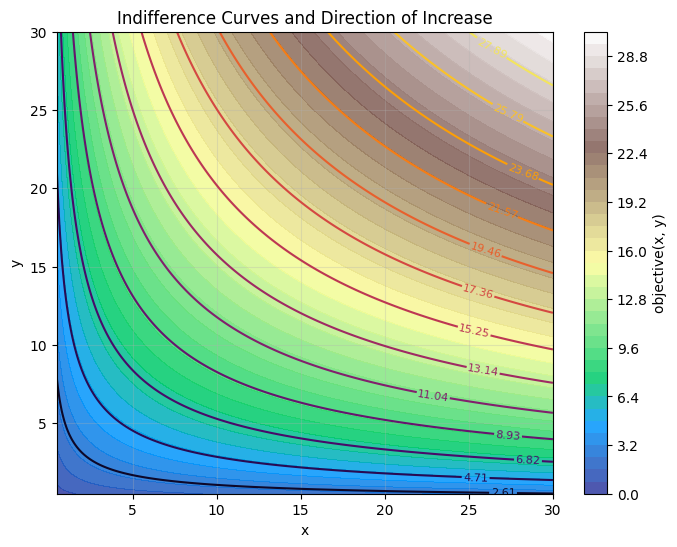

In [39]:
def step_example():
    import numpy as np

    def utility(v):
        x, y = v
        return (x ** 0.4) * (y ** 0.6)

    plot_2D(
        utility,
        x_rank=(0.5, 30),
        y_rank=(0.5, 30),
        lines=15,

        title="Indifference Curves and Direction of Increase"
    )

step_example()


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -12.244075206000865
           x: [ 9.600e+00  1.440e+01]
         nit: 6
         jac: [-5.100e-01 -5.103e-01]
        nfev: 19
        njev: 6
 multipliers: [ 5.102e-01]


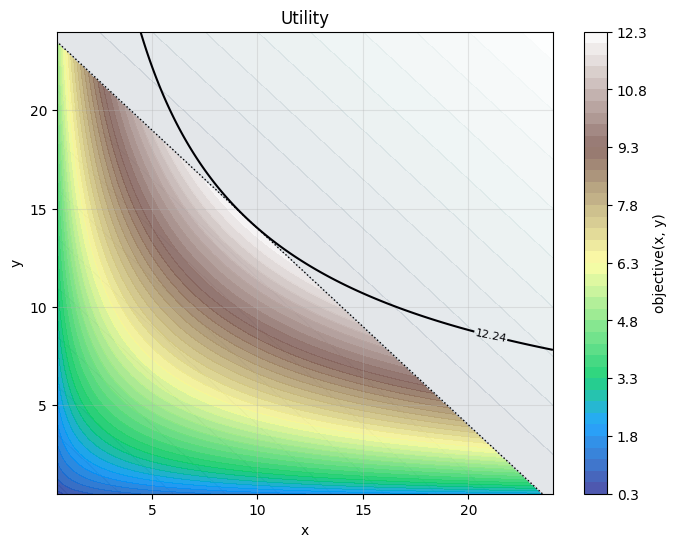

In [40]:
eps = 0.15

def utility(v):
    x, y = v
    return (x ** 0.4) * (y ** 0.6)

def neg_utility(v):
    return -utility(v)

def constraints(vars):
    return (24 - np.sum(vars))

constrain_def = {
    "type": "eq",
    "fun": constraints,
    }

initial_guess = [10, 10]

result = minimize(
    neg_utility,
    initial_guess,
    constraints=constrain_def
    )

print(result)

plot_2D(
    objective=utility,
    x_rank=(0.5, 24),
    y_rank=(0.5, 24),
    lines=[-result.fun],
    title="Utility",
    constraints=[constraints],
)


# Ledger checks
Duality as an audit.